In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
# Load the data
df = pd.read_csv('hiring.csv')

In [4]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
# Data Preprocessing
df.experience.fillna('zero', inplace=True)

In [6]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [13]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace=True)


In [14]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [17]:
# Convert text in experience column to numbers
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)

In [18]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


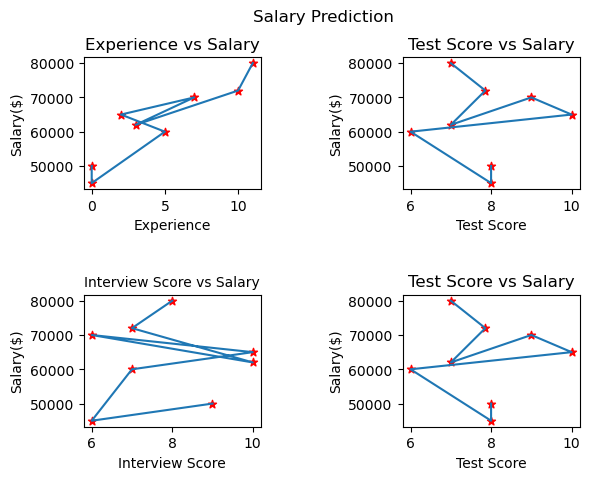

In [46]:

# Create a figure and a 2 x 2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Salary Prediction')
#first plot
ax1.plot(df['experience'],df['salary($)'])
ax1.set_title('Experience vs Salary')
ax1.set_xlabel('Experience',)
ax1.set_ylabel('Salary($)' )
ax1.scatter(df['experience'], df['salary($)'], color='red', marker='*', )

#second plot
ax2.plot(df['test_score(out of 10)'],df['salary($)'])
ax2.set_title('Test Score vs Salary')
ax2.set_xlabel('Test Score')
ax2.set_ylabel('Salary($)')
ax2.scatter(df['test_score(out of 10)'], df['salary($)'], color='red', marker='*')

#third plot
ax3.plot(df['interview_score(out of 10)'],df['salary($)'])
ax3.set_title('Interview Score vs Salary', fontsize=10)
ax3.set_xlabel('Interview Score')
ax3.set_ylabel('Salary($)')
ax3.scatter(df['interview_score(out of 10)'], df['salary($)'], color='red', marker='*')

#fourth plot
ax4.plot(df['test_score(out of 10)'],df['salary($)'])
ax4.set_title('Test Score vs Salary')
ax4.set_xlabel('Test Score')
ax4.set_ylabel('Salary($)')
ax4.scatter(df['test_score(out of 10)'], df['salary($)'], color='red', marker='*')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.8)

plt.show()

In [48]:
# create the model
Model = linear_model.LinearRegression()
Model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [49]:
Model.predict([[2,9,6]])

C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [50]:
Model.predict([[12,10,10]])

C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

In [51]:
# Model accuracy
Model.score(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df['salary($)'])

0.9639958361860578